Group Members:
1. Md Tasluf Morshed (191-15-12089)
2. Md.Riazul Islam Gisun (191-15-12772)
3. MD Assadujjaman Tilok (191-15-12594)
4. Towhidul Islam (191-15-12728)

In [ ]:
#Importing all libarey

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Import the Csv file
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
#Check the dataset how many attribute we have and there type
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Describe the numaric values to see their charecteristic
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#See the top 5 row from our dataset
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Handel Missing Value**

In [ ]:
#Check if there any missing value in numeric attribute
import math
for i in stroke['bmi'].unique():
    if math.isnan(i):
        print("Have Nan value")

Have Nan value


In [ ]:
#Check the missing in nominal attribute
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', nan], dtype=object)

In [ ]:
#We have missing value in BMI. So replace all the missing value by mean
stroke['bmi'] = stroke['bmi'].fillna(value=stroke['bmi'].mean())

In [ ]:
#Check if BMI missing value is gone or not
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
#We have missing value in smoking_status. So replace all the missing value by mode
stroke['smoking_status'] = stroke['smoking_status'].fillna(value=stroke['smoking_status'].mode()[0])

In [ ]:
#Check if smoking_status missing value is gone or not
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,never smoked,1


# **Data Visulization**

In [ ]:
import seaborn as sns

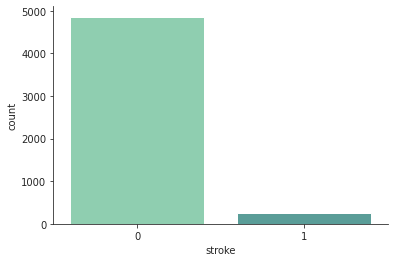

In [ ]:
#cheke how many people have stroke and how many does not storke
sns.set_style('ticks')
color = ['#85D8B1', '#4FA8A1']
sns.set_palette(sns.color_palette(color))
sns.countplot(x='stroke', data=stroke )
sns.despine()

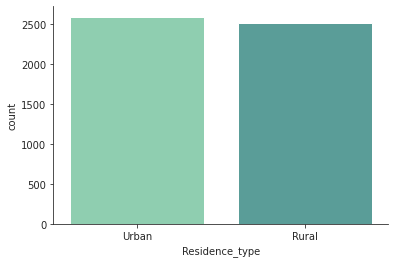

In [ ]:
#Check how many people are from Rural and how many of them are Urban
sns.set_style('ticks')
color = ['#85D8B1', '#4FA8A1']
sns.set_palette(sns.color_palette(color))
sns.countplot(x='Residence_type', data=stroke )
sns.despine()

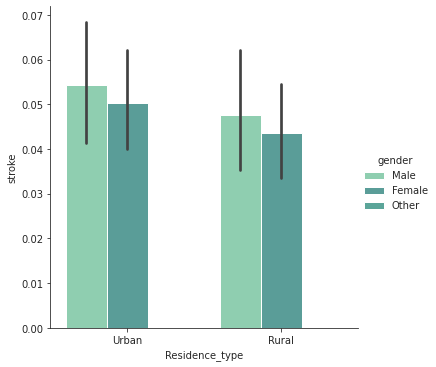

In [ ]:
sns.set_style('ticks')
color = ['#85D8B1', '#4FA8A1', '#4FB1A1']
sns.set_palette(sns.color_palette(color))
g = sns.catplot(
    data=stroke, kind="bar",
    x="Residence_type", y="stroke", hue='gender'
)
sns.despine()

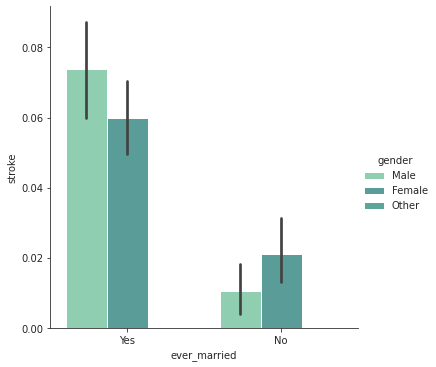

In [ ]:
sns.set_style('ticks')
color = ['#85D8B1', '#4FA8A1', '#4FB1A1']
sns.set_palette(sns.color_palette(color))
g = sns.catplot(
    data=stroke, kind="bar",
    x="ever_married", y="stroke", hue='gender'
)
sns.despine()

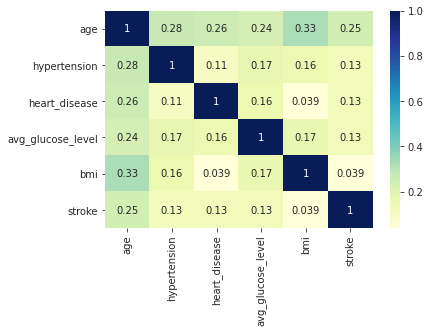

In [ ]:
new_data = stroke.drop('id', axis=1)
ren = new_data.corr()
sns.heatmap(ren,annot=True, cmap='YlGnBu')

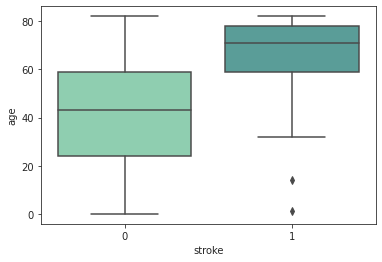

In [ ]:
sns.boxplot(x="stroke", y='age', data=stroke)

# **Handeling nominal variable**

In [ ]:
#Covert the nominal data into dummy values
nominal_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
final_data = pd.get_dummies(stroke,columns=nominal_column,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5110 non-null   int64  
 1   age                          5110 non-null   float64
 2   hypertension                 5110 non-null   int64  
 3   heart_disease                5110 non-null   int64  
 4   avg_glucose_level            5110 non-null   float64
 5   bmi                          5110 non-null   float64
 6   stroke                       5110 non-null   int64  
 7   gender_Male                  5110 non-null   uint8  
 8   gender_Other                 5110 non-null   uint8  
 9   ever_married_Yes             5110 non-null   uint8  
 10  work_type_Never_worked       5110 non-null   uint8  
 11  work_type_Private            5110 non-null   uint8  
 12  work_type_Self-employed      5110 non-null   uint8  
 13  work_type_children

In [ ]:
final_data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


# **Drop id colum as it has no implect in our dataset**

In [ ]:
#Drop the id column because it only indecate patients id
final_data.drop('id', inplace=True, axis=1)

In [ ]:
final_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


# **Divide our dataset into Train and test set**

In [ ]:
#Split the dataset into test set and trining set
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('stroke',axis=1)
y = final_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,0,0,1,0,0,1,0,0,1,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# **Use Decision tree algorithem**

In [ ]:
#import the Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
#Trin the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predict the test set
predictions = dtree.predict(X_test)

In [ ]:
#Find the precision recall f1-score support
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1446
           1       0.24      0.21      0.22        87

    accuracy                           0.92      1533
   macro avg       0.60      0.58      0.59      1533
weighted avg       0.91      0.92      0.92      1533



**Decision tree confusion matrix**

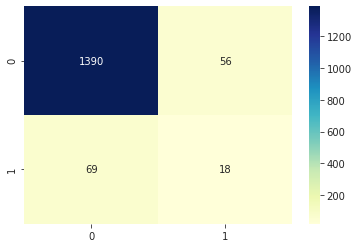

In [ ]:
#Print the confusion matrix
c_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(c_matrix,annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#Find the accuracy of the model
TP_TN = c_matrix[0,0]+c_matrix[1,1]
TP_FP_FN_TN = c_matrix[0,0]+c_matrix[0,1]+c_matrix[1,0]+c_matrix[1,1]
dtree_accuracy = int((TP_TN/TP_FP_FN_TN)*100)
print("Decision tree Accuracy: ",dtree_accuracy,"%")

Decision tree Accuracy:  91 %


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=101)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.25      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533



**Random Forest confusion matrix**

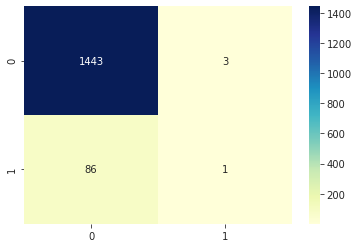

In [ ]:
#Print the confusion matrix
c_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(c_matrix,annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#Find the accuracy of the model
TP_TN = c_matrix[0,0]+c_matrix[1,1]
TP_FP_FN_TN = c_matrix[0,0]+c_matrix[0,1]+c_matrix[1,0]+c_matrix[1,1]
rforest_Accuracy = int((TP_TN/TP_FP_FN_TN)*100)
print("Random Forest Accuracy: ",rforest_Accuracy,"%")

Random Forest Accuracy:  94 %


# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **Support Vactor Machine**

In [ ]:
from sklearn import svm

In [ ]:
classifier = svm.SVC(kernel='poly')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.29      0.02      0.04        87

    accuracy                           0.94      1533
   macro avg       0.62      0.51      0.51      1533
weighted avg       0.91      0.94      0.92      1533



**Support Vactor Machine confusion matrix**

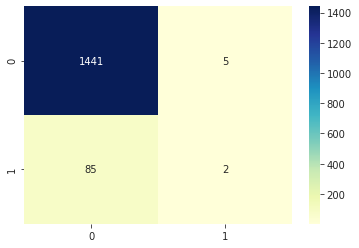

In [ ]:
#Print the confusion matrix
c_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(c_matrix,annot=True, cmap='YlGnBu', fmt='d')

In [ ]:
#Find the accuracy of the model
TP_TN = c_matrix[0,0]+c_matrix[1,1]
TP_FP_FN_TN = c_matrix[0,0]+c_matrix[0,1]+c_matrix[1,0]+c_matrix[1,1]
svm_Accuracy = int((TP_TN/TP_FP_FN_TN)*100)
print("Support Vactor Machine Accuracy: ",svm_Accuracy,"%")

Support Vactor Machine Accuracy:  94 %


# **Compare different Algorithem Accurecy**

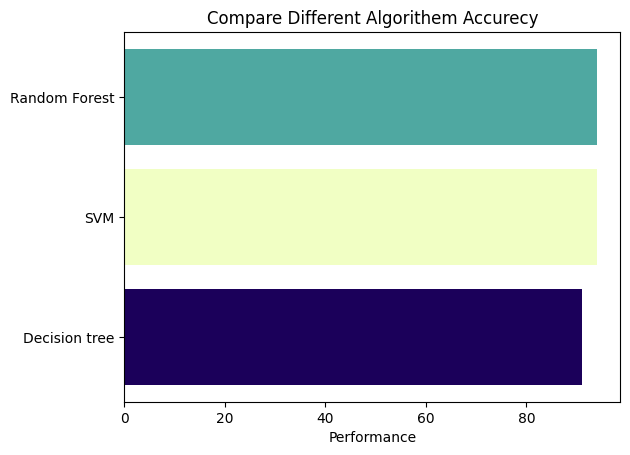

In [ ]:

plt.rcdefaults()
fig, ax = plt.subplots()

algo = ('Random Forest', 'SVM', 'Decision tree')
y_pos = np.arange(len(algo))
lis = [rforest_Accuracy,svm_Accuracy,dtree_accuracy]
performance = np.array(lis)

ax.barh(y_pos, performance, align='center', color=['#4FA8A1', '#F1FFC4', '#1B005A'])
ax.set_yticks(y_pos)
ax.set_yticklabels(algo)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Compare Different Algorithem Accurecy')

plt.show()